# Jupyter notebook - Random Forest for classification

We do an exercise to estimate the probability of heart disease using Random Forest.

We use GridSearchCV to perform cross validation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from scipy import stats # I might use this
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv('../Dataset/Heart.csv', sep =";")
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Data Description:
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4

1. Age: year 
2. Sex: sex of the patient
3. ChestPain: indicator of pain in the chest
4. RestBP: Resting blood pressure in mm Hg on admission to the hospital
5. Chol: serum cholestoral in mg/dl
6. Fbs: fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. RestECG: resting electrocardiographic results
8. MaxHR: maximum heart rate achieved
9. ExAng: exercise induced angina (1 = yes; 0 = no)
10. Oldpeak: ST depression induced by exercise relative to rest
11. Slope: the slope of the peak exercise ST segment
12. Ca: number of major vessels (0-3) colored by flourosopy
13. Thal: 34 = normal; 6 = fixed defect; 7 = reversable defect
14. Target

In [23]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [24]:
data.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [25]:
data = data.dropna()
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [26]:
# Create dummies
Chest_dummy = pd.get_dummies(data.ChestPain)
Thal_dummy = pd.get_dummies(data.Thal)
AHD_dummy = pd.get_dummies(data.AHD)

Chest_dummy = Chest_dummy.iloc[:,1:]
Thal_dummy = Thal_dummy.iloc[:,1:]
AHD_dummy = AHD_dummy.iloc[:,1:]

# drop the variables that are going to be transformed in NaN
data = data.drop('ChestPain', axis = 1)
data =data.drop('Thal', axis = 1)
data = data.drop('AHD', axis = 1)
# attach dummy a new data file
data_dummy = pd.concat([data, Chest_dummy, Thal_dummy, AHD_dummy], axis = 1)

In [27]:
X = data_dummy.drop('Yes', axis = 1)
y = data_dummy['Yes']

In [28]:
# split the sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

# Using GridSearch CV

In [29]:
rf = RandomForestClassifier(random_state = 10)
parameters = {'n_estimators':[2,5,10,15,20,30,50,70,80,100,15, 200, 220],
             'max_depth':range(1,10)}

clf = GridSearchCV(rf, parameters, cv = 10, iid = True,
                  scoring = "accuracy")

# as scoring we can specify: balanced_accuracy, neg_log_loss

In [30]:
clf.fit(X_train, y_train)
print(clf.best_estimator_)
# pred = clf.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [31]:
# Predictive accuracy
print('Predictive accuracy: ', clf.score(X_test, y_test)

0.8

In [32]:
# Let's plot the confusion matrix to see how our model performs in prediction
y_pred = clf.predict(X_test)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat

,0,1
0,26,2
1,10,22


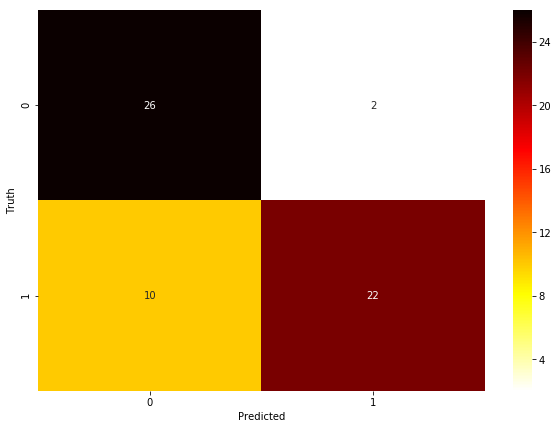

In [37]:
 # let's give a better graph
plt.figure(figsize=(10,7))
sn.heatmap(conf_mat, annot=True, cmap = 'hot_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [38]:
# only number of trees 
rf = RandomForestClassifier(random_state = 10)
parameters = {'n_estimators':[2,5,10,15,20,30,50,70,80,100,15, 200, 220]}

clf = GridSearchCV(rf, parameters, cv = 10, iid = True,
                  scoring = "accuracy")

# as scoring we can specify: balanced_accuracy, neg_log_loss

In [39]:
clf.fit(X_train, y_train)
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)


In [41]:
# Predictive accuracy
print('Predictive accuracy: ', clf.score(X_test, y_test))

Predictive accuracy:  0.8333333333333334


In [42]:
# Let's plot the confusion matrix to see how our model performs in prediction
y_pred = clf.predict(X_test)
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat

,0,1
0,28,0
1,10,22


In [50]:
data_dummy.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,nonanginal,nontypical,typical,normal,reversable,Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


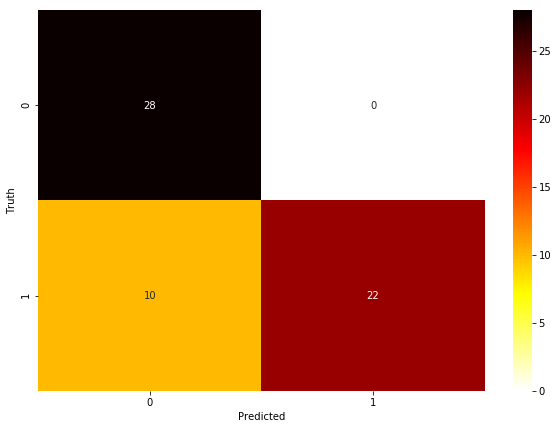

In [43]:
 # let's give a better graph
plt.figure(figsize=(10,7))
sn.heatmap(conf_mat, annot=True, cmap = 'hot_r')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()